In [12]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Para mostrar gráficos en Jupyter Notebook
%matplotlib inline

# 2. Cargar el dataset (asegúrate de tener la ruta correcta)
dataset = pd.read_csv('archivo_gym_members_exercise_tracking_version2.csv')

### Paso 3. Seleccion de las variables fisicas que se usaran para clustering

In [14]:
# 3. Seleccionar las variables físicas que usaremos para clustering
features = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Experience_Level', 'Workout_Frequency (days/week)']
X = dataset[features]

### Paso 4 y 5. El modelo KMeans se entrena con los datos de las variables físicas y luego asigna a cada sesión una etiqueta de cluster (0,1,2,3). Estas etiquetas se añaden al dataset para análisis posterior.

In [15]:
# 4. Crear y aplicar el modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 5. Asignar etiquetas de cluster al dataset
dataset['cluster'] = kmeans.labels_

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Paso 6. Los centroides representan el perfil promedio de cada cluster. Son vectores con la media de cada variable física para los puntos de ese cluster.

In [16]:
# 6. Obtener los centroides (puntos medios) de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\n #6. Centroides de los clusters:")
print(centroids)


 #6. Centroides de los clusters:
         Age    Gender  Weight (kg)  Height (m)        BMI  Fat_Percentage  \
0  26.168724  0.226337    60.470782    1.671523  21.865062       26.876132   
1  36.604317  1.000000   113.860432    1.796619  35.719496       24.936691   
2  47.918301  0.303922    57.745425    1.689346  20.520523       26.533660   
3  40.452632  0.785965    83.050877    1.765684  26.954386       21.705263   

   Experience_Level  Workout_Frequency (days/week)  
0          1.740741                       3.251029  
1          1.482014                       2.928058  
2          1.754902                       3.271242  
3          2.087719                       3.628070  


### Paso 7. Saber cuántas sesiones hay en cada cluster nos da una idea del tamaño relativo de cada grupo.

In [17]:
# 7. Ver cuántas sesiones hay en cada cluster
print("\n #7. Cantidad de sesiones por cluster:")
print(dataset['cluster'].value_counts())


 #7. Cantidad de sesiones por cluster:
cluster
2    306
3    285
0    243
1    139
Name: count, dtype: int64


### Paso 8. Se calculan las medias para comprender mejor el perfil típico de cada cluster.

In [18]:
# 8. Analizar medias y perfiles por cluster
cluster_means = dataset.groupby('cluster')[features].mean()
print("\n #8. Medias de variables físicas por cluster:")
print(cluster_means)


 #8. Medias de variables físicas por cluster:
               Age    Gender  Weight (kg)  Height (m)        BMI  \
cluster                                                            
0        26.168724  0.226337    60.470782    1.671523  21.865062   
1        36.604317  1.000000   113.860432    1.796619  35.719496   
2        47.918301  0.303922    57.745425    1.689346  20.520523   
3        40.452632  0.785965    83.050877    1.765684  26.954386   

         Fat_Percentage  Experience_Level  Workout_Frequency (days/week)  
cluster                                                                   
0             26.876132          1.740741                       3.251029  
1             24.936691          1.482014                       2.928058  
2             26.533660          1.754902                       3.271242  
3             21.705263          2.087719                       3.628070  


### Paso 9. Los boxplots ayudan a visualizar la dispersión y posibles outliers por cluster y variable.
* Muestra la cantidad de sesiones en cada cluster con un gráfico de barras.
* Muestra la distribución del peso (Weight (kg)) por cluster con un boxplot para ver mediana, dispersión y posibles outliers.
* Hace lo mismo para la edad (Age) y porcentaje de grasa corporal (Fat_Percentage).

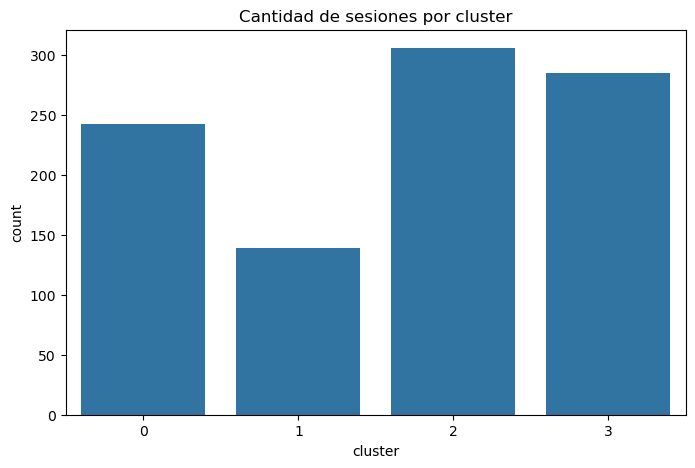

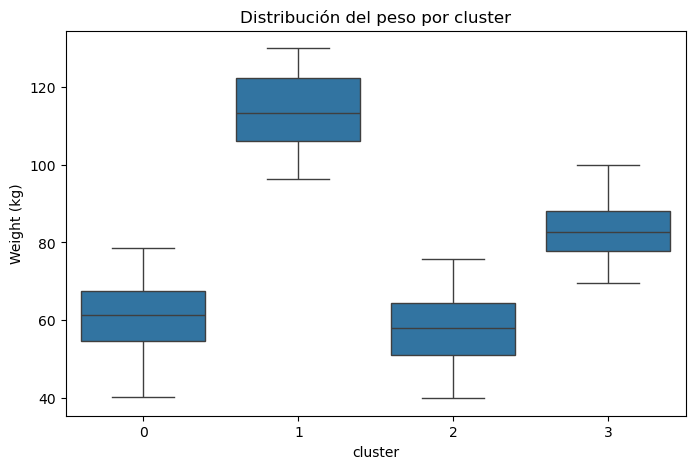

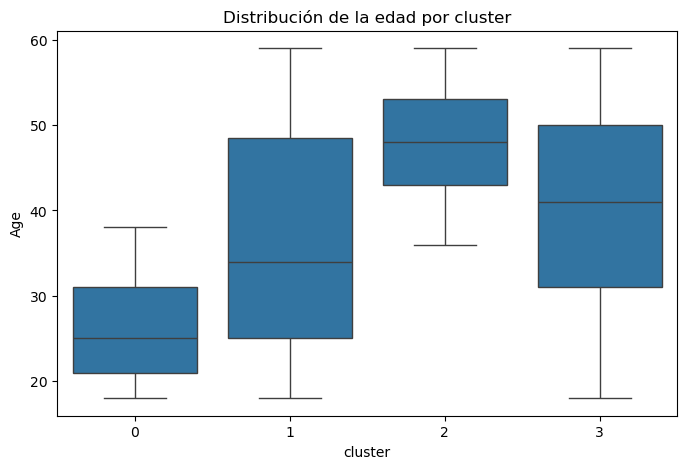

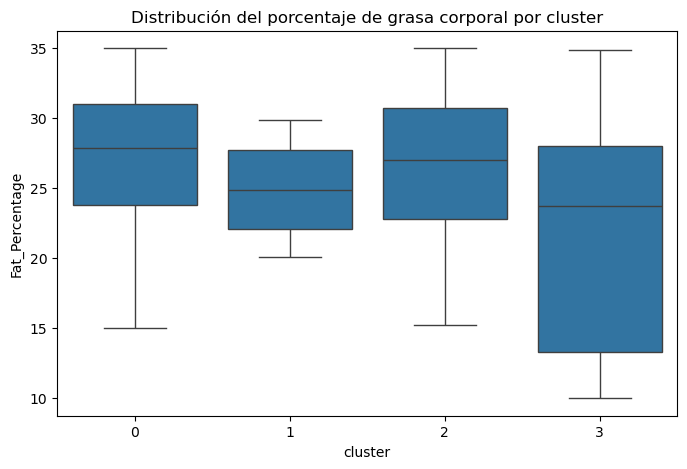

In [20]:
# Gráfico de barras para cantidad de sesiones por cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=dataset)
plt.title('Cantidad de sesiones por cluster')
plt.show()

# Boxplot de peso por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Weight (kg)', data=dataset)
plt.title('Distribución del peso por cluster')
plt.show()

# Boxplot de edad por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Age', data=dataset)
plt.title('Distribución de la edad por cluster')
plt.show()

# Boxplot de porcentaje de grasa corporal por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Fat_Percentage', data=dataset)
plt.title('Distribución del porcentaje de grasa corporal por cluster')
plt.show()


### Interpretacion de centroides

In [10]:
for i, row in cluster_means.iterrows():
    print(f"\nPerfil del Cluster {i}:")
    print(f"Edad promedio: {row['Age']:.1f} años")
    print(f"Porcentaje de género masculino: {row['Gender']*100:.1f}% (1=masculino, 0=femenino)")
    print(f"Peso promedio: {row['Weight (kg)']:.1f} kg")
    print(f"Altura promedio: {row['Height (m)']:.2f} m")
    print(f"IMC promedio: {row['BMI']:.1f}")
    print(f"Porcentaje de grasa corporal promedio: {row['Fat_Percentage']:.1f}%")
    print(f"Nivel de experiencia promedio: {row['Experience_Level']:.1f}")
    print(f"Frecuencia de entrenamiento promedio: {row['Workout_Frequency (days/week)']:.1f} días por semana")



Perfil del Cluster 0:
Edad promedio: 26.2 años
Porcentaje de género masculino: 22.6% (1=masculino, 0=femenino)
Peso promedio: 60.5 kg
Altura promedio: 1.67 m
IMC promedio: 21.9
Porcentaje de grasa corporal promedio: 26.9%
Nivel de experiencia promedio: 1.7
Frecuencia de entrenamiento promedio: 3.3 días por semana

Perfil del Cluster 1:
Edad promedio: 36.6 años
Porcentaje de género masculino: 100.0% (1=masculino, 0=femenino)
Peso promedio: 113.9 kg
Altura promedio: 1.80 m
IMC promedio: 35.7
Porcentaje de grasa corporal promedio: 24.9%
Nivel de experiencia promedio: 1.5
Frecuencia de entrenamiento promedio: 2.9 días por semana

Perfil del Cluster 2:
Edad promedio: 47.9 años
Porcentaje de género masculino: 30.4% (1=masculino, 0=femenino)
Peso promedio: 57.7 kg
Altura promedio: 1.69 m
IMC promedio: 20.5
Porcentaje de grasa corporal promedio: 26.5%
Nivel de experiencia promedio: 1.8
Frecuencia de entrenamiento promedio: 3.3 días por semana

Perfil del Cluster 3:
Edad promedio: 40.5 años
Po

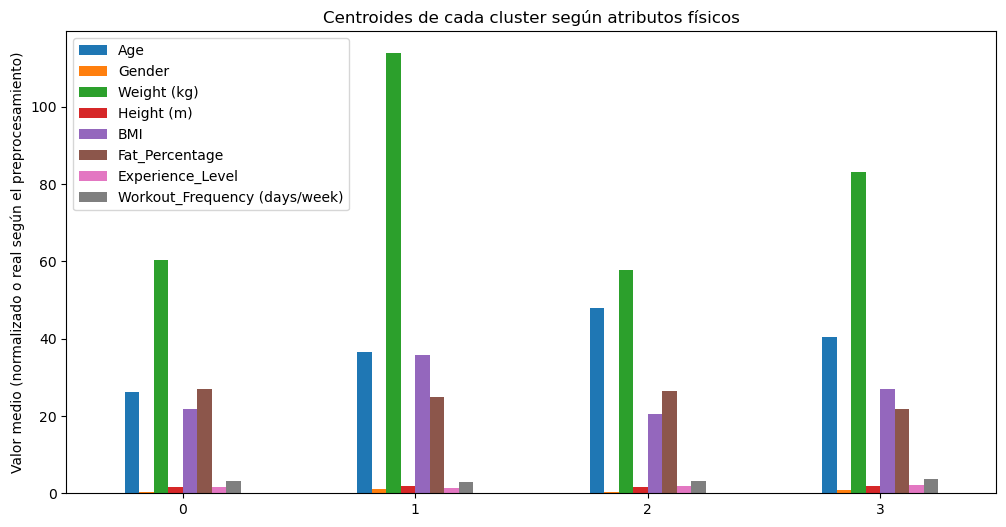

In [11]:
import matplotlib.pyplot as plt

centroids.plot(kind='bar', figsize=(12,6))
plt.title('Centroides de cada cluster según atributos físicos')
plt.ylabel('Valor medio (normalizado o real según el preprocesamiento)')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()


## Interpretación de la gráfica de centroides

#### Age (Edad):
* _El cluster 2 agrupa a usuarios más jóvenes, mientras que el cluster 1 los usuarios con edad media más alta._

#### Gender (Género):
* _Se codificó como 0 y 1, donde 1 representa masculino. El cluster 3 es casi exclusivamente masculino._

#### Weight (kg) y Height (m) (Peso y Altura):
* _El cluster 1 tiene un peso claramente mayor que los demás, mientras que el cluster 0 agrupa usuarios con menor peso y altura promedio._

#### BMI (Índice de Masa Corporal):
* _Cluster 1 tiene un IMC más alto, indicando usuarios con mayor masa relativa a su altura._

#### Fat_Percentage (Porcentaje de Grasa Corporal):
* _Valores relativamente estables entre clusters, aunque el cluster 0 tiene un porcentaje algo más bajo._

#### Experience_Level (Nivel de experiencia):
* _Se aprecia que los clusters 0 y 2 tienen niveles de experiencia más altos._

#### Workout_Frequency (Frecuencia de entrenamiento):
* _Similar para todos, ligeramente más alta en cluster 0._


## Estos centroides representan el "perfil promedio" o "representante típico" de cada cluster, y sirven para:

* Identificar características principales de cada grupo de usuarios o sesiones.

* Ayudarte a poner nombre o etiquetas a cada cluster según sus atributos (por ejemplo, "usuarios jóvenes y ligeros", "usuarios con alto BMI y peso elevado", etc.).

* Facilitar la comparación y análisis posterior para tomar decisiones o hacer predicciones específicas.